In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pypfopt
from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting
from pypfopt import EfficientFrontier, objective_functions
from pypfopt import HRPOpt
from RiskParityModel import *
#from MaxSharpe import *
from datetime import datetime,timedelta
from scipy.stats import norm
import json

In [2]:
with open('/Users/afraaa/portfolio/sector.json', 'r') as f:
    sector_dict = json.load(f)
add = '/Users/afraaa/portfolio/申万行业指数.xlsx'
sector_index = pd.read_excel(add,parse_dates=[0],index_col=0)
add= '/Users/afraaa/portfolio/prices.xlsx'
prices_df = pd.read_excel(add,parse_dates=[0],index_col=0)

In [3]:
def time_filter(df,start,end):
    temp = df.loc[(df.index >= start) & (df.index <= end)]
    return temp

In [7]:
tickers = prices_df.columns
ticker = tickers[0]

### 时间序列的correlation，新代码

In [10]:
s1 = prices_df[ticker]

In [14]:
s2 = sector_index[sector_dict[ticker]]

In [17]:
s1.corr(s2)

0.9011317996765604

In [18]:
s1

2018-02-01     4.8742
2018-02-02     4.9236
2018-02-05     4.9154
2018-02-06     4.4214
2018-02-07     4.4625
               ...   
2023-01-25        NaN
2023-01-26        NaN
2023-01-27        NaN
2023-01-30    12.3600
2023-01-31    12.5200
Name: 000009.SZ, Length: 1304, dtype: float64

In [24]:
delta = timedelta(days=30*6)
start = datetime(2018, 2, 1) + delta
end  = datetime(2023, 1, 31)
date_index = pd.date_range(start=start, end=end, freq='180D')
stock_sec_df = pd.DataFrame(index = date_index)

In [28]:
temp = start
while(temp<end):
    s1_temp = time_filter(s1,temp-delta,temp)
    s2_temp = time_filter(s2,temp-delta,temp)
    stock_sec_df.loc[temp,ticker] = s1_temp.corr(s2_temp)
    temp += delta

In [29]:
stock_sec_df

,000009.SZ
2018-07-31,0.966168
2019-01-27,0.732060
2019-07-26,0.847873
2020-01-22,0.883419
2020-07-20,0.967486
2021-01-16,-0.351137
2021-07-15,0.743045
2022-01-11,-0.360910
2022-07-10,0.894908
2023-01-06,0.657392


<Axes: >

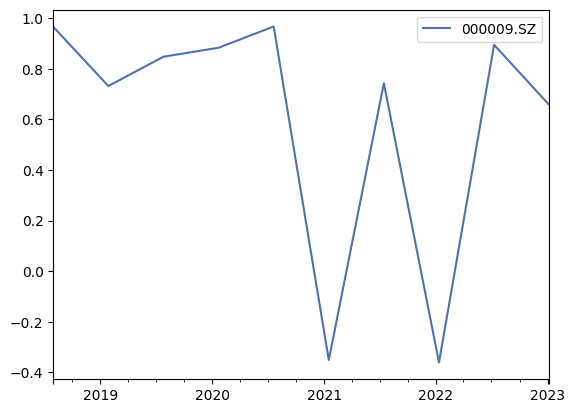

In [31]:
stock_sec_df.plot()

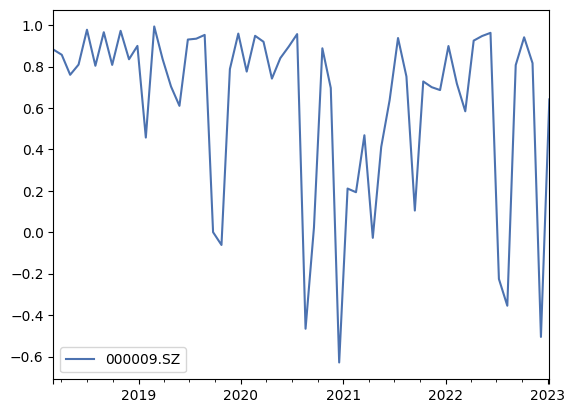

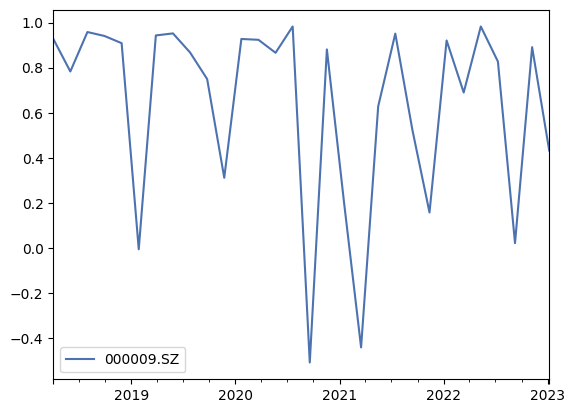

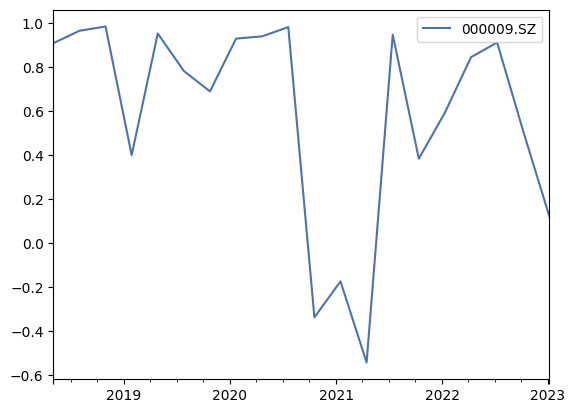

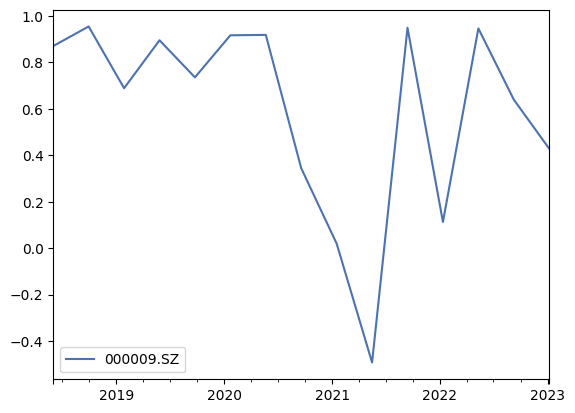

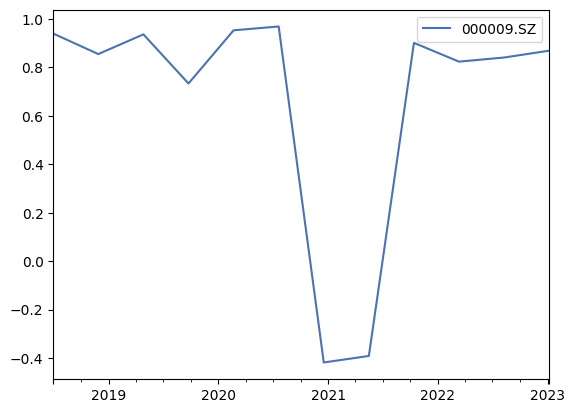

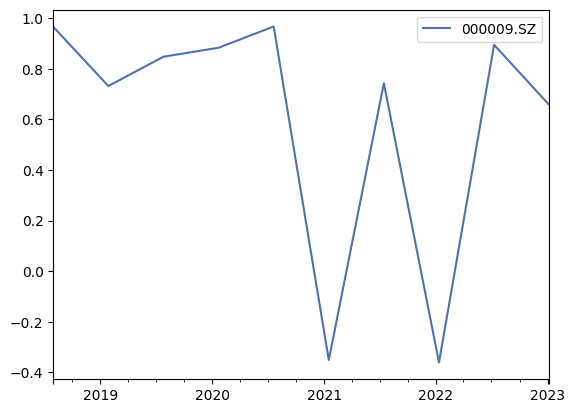

In [33]:
for month in [1,2,3,4,5,6]:
    delta = timedelta(days=30*month)
    start = datetime(2018, 2, 1) + delta
    end  = datetime(2023, 1, 31)
    freq = '{}D'.format(30*month)
    date_index = pd.date_range(start=start, end=end, freq=freq)
    stock_sec_df = pd.DataFrame(index = date_index)
    temp = start
    while(temp<end):
        s1_temp = time_filter(s1,temp-delta,temp)
        s2_temp = time_filter(s2,temp-delta,temp)
        stock_sec_df.loc[temp,ticker] = s1_temp.corr(s2_temp)
        temp += delta
    stock_sec_df.plot()
    plt.show()